# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Определение-и-изучение-пропущенных-значений" data-toc-modified-id="Определение-и-изучение-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение и изучение пропущенных значений</a></span></li><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-следующие-параметры:-площадь,-цену,-число-комнат,-высоту-потолков.-Построим-гистограммы-для-каждого-параметра." data-toc-modified-id="Изучаем-следующие-параметры:-площадь,-цену,-число-комнат,-высоту-потолков.-Построим-гистограммы-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучаем следующие параметры: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.</a></span></li><li><span><a href="#Изучаем-время-продажи-квартиры.-Построим-гистограмму.-Посчитаем-среднее-и-медиану.-Опишем,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Изучаем-время-продажи-квартиры.-Построим-гистограмму.-Посчитаем-среднее-и-медиану.-Опишем,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучаем время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li><li><span><a href="#Уберём-редкие-и-выбивающиеся-значения.-Опишем,-какие-особенности-обнаружили." data-toc-modified-id="Уберём-редкие-и-выбивающиеся-значения.-Опишем,-какие-особенности-обнаружили.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучаем,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучаем-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Изучаем-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучаем,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучаем-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Изучаем-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от площади, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучаем зависимость от даты размещения: дня недели, месяца и года.</a></span></li><li><span><a href="#Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-'locality_name'." data-toc-modified-id="Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-'locality_name'.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.</a></span></li><li><span><a href="#Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделии-квартиры-в-Санкт-Петербурге-('locality_name').-Наша-задача-—-выяснить,-какая-область-входит-в-центр.-Создадим-столбец-с-расстоянием-до-центра-в-километрах:-округлим-до-целых-значений.-После-этого-посчитаем-среднюю-цену-для-каждого-километра.-Постром-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определим-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона." data-toc-modified-id="Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделии-квартиры-в-Санкт-Петербурге-('locality_name').-Наша-задача-—-выяснить,-какая-область-входит-в-центр.-Создадим-столбец-с-расстоянием-до-центра-в-километрах:-округлим-до-целых-значений.-После-этого-посчитаем-среднюю-цену-для-каждого-километра.-Постром-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определим-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделии квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Постром график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.</a></span></li><li><span><a href="#Выделим-сегмент-квартир-в-центре.-Проанализируем-эту-территорию-и-изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделаем-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?" data-toc-modified-id="Выделим-сегмент-квартир-в-центре.-Проанализируем-эту-территорию-и-изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделаем-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

**Общие положения**

**Цель проекта** - определить рыночную стоимость объектов недвижимости.  

Основные шаги:  

1. Обзор данных  
2. Предобработка данных  
3. Иследовательский анализ данных  
4. Общий вывод

**Описание полей данных**  

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении

## Обзор данных

Составляем первое представление о данных банка.  

Импортируеи основной инструмент для аналитики - библиотеку `pandas`.  

In [1]:
import pandas as pd #чтение файла с данными и сохранение в df 
from datetime import datetime # модуль для работой с датами и временем
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib.pyplot для визуальзации графиков
import numpy as np    # импортируем библиотеку нампай для массивов
import seaborn as sns # импортируем модуль для построения графиков

In [2]:
pd.options.display.max_columns = 200 #показываем все колонки df

Прочитаем файл real_estate_data.csv из папки /datasets и сохраним его в переменную df:

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') # чтение файла с данными и сохранение в df

Выведем на экран первые десять строк таблицы:

In [4]:
df.head(10) #получение первых 10 строк таблицы 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Одной командой получаем общую информацию о таблице:

In [5]:
 df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 Посмотрим сводную статистику:

In [6]:
df.describe() # выводим сводную статистику

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Итак, всего у нас 23 699 записи. В таблице двадцать два столбца. Типы данных в четырнадцати столбцах — `float`, в трёх столбцах -`int`, в трёх столбцах - `object`, в двух столбцах `bool`.

Также следует отметить, что четырнадцать колонок имеют пропуски. Есть некорректный тип данных, по ряду признаков существуют аномальные значения.

Более подробно:
1. `first_day_exposition` - object - должен быть тип datetime
2. `ceiling_height` - есть нулевые значения
3. `floors_total` - должен быть тип int, т.к. количество этажей - целое значение и есть нулевые значения
4. `is_apartment` - должен быть тип bool и есть нулевые значения
5. `living_area` - есть нулевые значения
6. `kitchen_area` - есть нулевые значения
7. `balcony` - есть нулевые значения
8. `locality_name`  - есть нулевые значения
9. `airports_nearest` - есть нулевые значения
10. `cityCenters_nearest` - есть нулевые значения
11. `parks_around3000` - тип должен быть int и есть нулевые значения
12. `parks_nearest`  - есть нулевые значения
13. `ponds_around3000` - тип должен быть int и есть нулевые значения
14. `ponds_nearest` - есть нулевые значения
15. `days_exposition` - тип должен быть int и есть нулевые значения 

## Предобработка данных

### Определение и изучение пропущенных значений

Сначала посчитаем, сколько в таблице пропущенных значений.

In [7]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим долю пропущенных значений.

In [8]:
df.isna().mean() # находим долю пропущенных значений 

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Больше всего доля пропущенных значений в столбце `is_apartment`, которая составила 88.3%.  
В столбцах `parks_nearest` и `ponds_nearest`, доли пропущенных значений составили 65.9 % и 61.6 % соответственно.  
Далее в столбцах `balcony` и `ceiling_height` доли составили 48.6% и 38.8% соответственно.  

В столбцах `airports_nearest`, `cityCenters_nearest`,`parks_around3000`,`ponds_around3000` доли составили примерно по 20.3%.  
В столбце `days_exposition`  доля пропусков составила 13.4%.  
По остальным столбцам - доля пропущенных значений менее 10%.  
И в столбцах `locality_name` и `floors_total` доля пропущенных значений от 0.2%  до  0.4%.

Отбросим данные с незначительным количеством пропусков в столбцах `locality_name`, `floors_total`:


In [9]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True) # отбросим данные с пропущенными значениями

Посмотрим уникальные названия населённых пунктов в столбце `locality_name`.

In [10]:
df['locality_name'].sort_values().unique()# просмотр уникальных названий населённых пунктов

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Сделаем посЁлки поселками. Чтобы не было путаницы.

In [11]:
df['locality_name'] = df['locality_name'].str.replace("посёлок", "поселок") #переименуем название

Посмотрим на пустые значения в столбце `is_apartment`.

In [12]:
df[df['is_apartment'].isnull()].tail() # выведем на экран 10 последних строк столбца 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В столбце `is_apartment` выясняем количество значений.

In [13]:
df['is_apartment'].value_counts() # посчитаем уникальные значения

False    2710
True       50
Name: is_apartment, dtype: int64

Всего аппартаментов - 50. Заменяем пропущенные значения на  0 и меняем тип данных на int.

In [14]:
df['is_apartment'] = df['is_apartment'].fillna(0).astype(int) # Заменяем пропущенные значения на 0 и меняем тип данных на int

Если говорить о причинах возникновения пропусков, скорее всего они связаны с тем, апартаменты появились сравнительно недавно. Правовой статус апартаментов в действующем законодательстве не определен.

В столбце `balcony` заменяем пропущенные значения на 0 заменим вещественный тип данных на целочисленный.

In [15]:
df['balcony'] = df['balcony'].fillna(0).astype(int) # Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0

Если говорить о причинах возникновения пропусков, скорее всего они связаны с тем, скорей всего балконов нет и/или люди не указали при заполнении эту информацию.

На примере с парками и прудами не очень ясна природа происхождения NaN. Возможно проблема в техническом сбое.
Оставим пока столбцы `parks_nearest` и `ponds_nearest` с пропусками, так как корректно мы их заполнить не можем, а для проекта и выводов данные не понадобятся.

В столбце `days_exposition` заменяем пропущенные значения на 0 заменим вещественный тип данных на целочисленный.

In [16]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int) #заменим пропуски в days_exposition и заменим тип данных

### Приведение данных к нужным типам

В столбце `open_plan` выясняем количество значений.

In [17]:
df['open_plan'].value_counts() # посчитаем уникальные значения

False    23498
True        67
Name: open_plan, dtype: int64

Всего квартир со свободной планировкой - 67. Меняем тип данных на int.

In [18]:
df['open_plan'] = df['open_plan'].astype(int) # Меняем тип данных на int

В столбце `studio` выясняем количество значений.

In [19]:
df['studio'].value_counts() # посчитаем уникальные значения

False    23419
True       146
Name: studio, dtype: int64

Всего квартир-студий  - 149. Меняем тип данных на int.

In [20]:
df['studio'] = df['studio'].astype(int) # Меняем тип данных на int

В столбце `last_price` меняем тип данных на int.

In [21]:
df['last_price'] = df['last_price'].astype(int) # Приводим в целочисленный тип стоимость квартиры

В столбце `first_day_exposition` меняем тип данных на datetime.

In [22]:
# Приводим к типу даты дату публикации
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

 Посмотрим столбец `ceiling_height` - высоту потолков.

Построим гистограмму 

<AxesSubplot:ylabel='Frequency'>

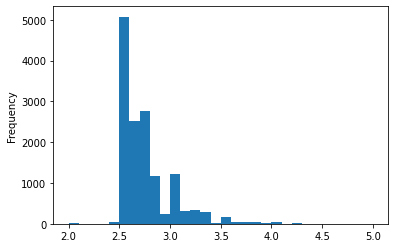

In [23]:
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5)) # строим гистрограмму

Посчитаем уникальные значения

In [24]:
df['ceiling_height'].value_counts() # посчитаем уникальные значения

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Посмотрим сводную статистику

In [25]:
df['ceiling_height'].describe() #выводим сводную статистику

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Отсортируем данные со значением высоты потолка более 4-х метров

In [26]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20) # отсортируем высоту потолков > 4 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000,43.0,2019-03-18,2,25.0,5.0,29.0,3,0,0,0,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,0,0,0,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,0,0,0,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,0
14382,9,1700000,35.0,2015-12-04,1,25.0,5.0,20.0,2,0,0,0,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206
11285,0,1950000,37.0,2019-03-20,1,25.0,5.0,17.0,4,0,0,0,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,0,0,0,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,0,0,0,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,0,0,0,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,0,0,0,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,0,0,0,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


Видим что есть необоснованно большие значения но пока оставим их как есть,
медиана от среднего отличается не сильно из-за этих выбросов во всей выборке.

Посмотрим столбец `living_area` - жилую площадь.

In [27]:
df['living_area'].value_counts() # посчитаем уникальные значения

18.00    882
17.00    673
30.00    598
16.00    483
20.00    479
        ... 
43.81      1
54.43      1
86.10      1
99.70      1
16.74      1
Name: living_area, Length: 1769, dtype: int64

In [28]:
df['living_area'].describe() #выводим сводную статистику

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Можно высчитать для строк с пропусками жилую площадь, как вариант, но мы не будем тратить на это время.

Снова смотрим общую информацию о таблице

In [29]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  int64         
 10  studio                23565 non-null  int64         
 11  open_plan             23565 non-null  int64         
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Найдём цену квадратного метра и результат запишем в новый столбец `price_per_area`  и приведём к типу int

In [30]:
df['price_per_area'] = (df['last_price'] / df['total_area']).astype('int') # находим цену м2 и приведём к типу int

Найдем отношение площади кухни к общей площади и результат запишем в новый столбец `kitchen_to_total`.

In [31]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area'] # находим отношение площади кухни к общей площади

Найдем соотношение жилой площади и общей площади и результат запишем в новый столбец `living_to_total`.

In [32]:
df['living_to_total'] = df['living_area'] / df['total_area'] # находим соотношение жилой площади и общей площади

Найдём день недели публикации объявления и результат запишем в новый столбец `first_day_weekday`.

In [33]:
df['first_day_weekday'] = df['first_day_exposition'].dt.weekday # находим день недели публикации объявления

Найдём месяц публикации объявления и результат запишем в новый столбец `first_day_month`.

In [34]:
df['first_day_month'] = df['first_day_exposition'].dt.month # находим месяц публикации объявления

Найдём год публикации объявления и результат запишем в новый столбец `first_day_year`.

In [35]:
df['first_day_year'] = df['first_day_exposition'].dt.year # находим год публикации объявления

Напишем функцию категоризации по этажам.

In [36]:
def floor_category(row): #создаём функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

Создадим новый столбец `floor_category`, в котором будут данные о категории этажей.

In [37]:
  df['floor_category'] = df.apply(floor_category, axis = 1) #категоризуем этажи с помощью функции 

## Исследовательский анализ данных

### Изучаем следующие параметры: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.

Импортируем библиотеку matplotlib.pyplot для визуальзации графиков

**Изучим общую площадь**

Построим гистограмму 

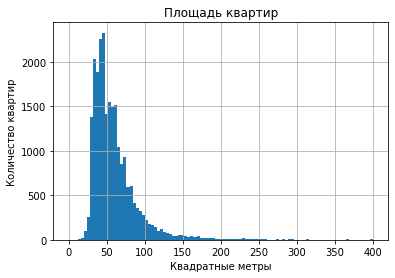

In [38]:
df['total_area'].hist(bins=100,range=(0,400)) # построим гистограмму
plt.title('Площадь квартир') # подпишем график
plt.xlabel('Квадратные метры') # подпишем ось x
plt.ylabel('Количество квартир') # подпишем ось Y
plt.show() # выведем график на экран

Посмотрим описательную статистику

In [39]:
df['total_area'].describe() # выведем описательную статистику

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

**Вывод:** распределение данных нормальное, есть выбросы но они не сильно влияют на данные.Больше всего продается квартир площадью 45-49 м.кв
По гистограмме кроме распределения нечего больше указать, с помошью describe получили общее представление.

**Изучим цену**

Построим гистограмму

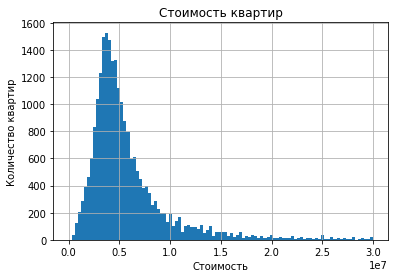

In [40]:
df['last_price'].hist(bins=100,range=(0,30000000)) #построим гистограмму
plt.title('Стоимость квартир') #подпишем график
plt.xlabel('Стоимость') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Посмотрим описательную статистику

In [41]:
df['last_price'].describe() #выведем описательную статистику

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Вывод:** с данными все впорядке, но значения выводятся в экспоненциальной записи чисел. Из гистораммы видно, что больше всего квартир продается за 3-4 млн. руб.

**Изучим число комнат**

Построим гистограмму

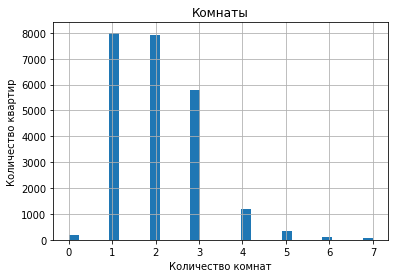

In [42]:
df['rooms'].hist(bins=30,range=(0,7)) #построим гистограмму
plt.title('Комнаты') #подпишем график
plt.xlabel('Количество комнат') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Посмотрим описательную статистику

In [43]:
df['rooms'].describe() #выведем описательную статистику

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Вывод:** с данными все впорядке. Больше всего продаются одно-двухкомнатные квартиры.

**Изучим высоту потолков**

Построим гистограмму

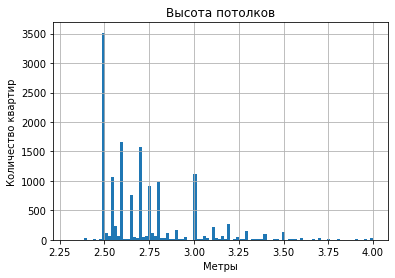

In [44]:
df['ceiling_height'].hist(bins=100,range=(2.3,4)) #построим гистограмму
plt.title('Высота потолков') #подпишем график
plt.xlabel('Метры') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Посмотрим описательную статистику

In [45]:
df['ceiling_height'].describe() #выведем описательную статистику

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Вывод:** с данными все впорядке. Больше всего продаж квартир с высотой потолка 2.5 м

**Вывод:**

Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60 м2, а медиана 52 м2. Распределение данных Гаусса.

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

Во всех данных есть неадекватные значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, а также цена квартиры  

в 12190 рублей. О данных неадекватных значениях мы спросим у сотрудников, предоставивших нам выборку данных,   

для общего изучения данных, мы не станем убирать эти выбивающиеся значения.

### Изучаем время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Прежде чем начать выполнять это задание сделаем предположение, что дата снятия объявления может не считаться датой продажи, причем в непонятном для нас количестве случаев...

Ещё раз посмотрим наименования колонок нашей таблицы

In [46]:
df.columns # выводим наименование колонок

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_area',
       'kitchen_to_total', 'living_to_total', 'first_day_weekday',
       'first_day_month', 'first_day_year', 'floor_category'],
      dtype='object')

Построим диаграмму размаха для времени продаж

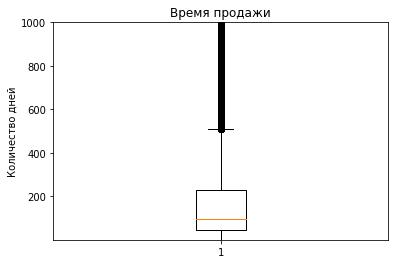

In [47]:
plt.boxplot(df[df['days_exposition']!=0]['days_exposition']) #  строим диаграмму размаха для ненулевых значений столбца days_exposition
plt.ylim(1,1000) 
plt.title('Время продажи') # название графика
plt.ylabel('Количество дней') # подписываем ось Y 
plt.show() # выводим на экран

Построим гистрограмму для времени продаж

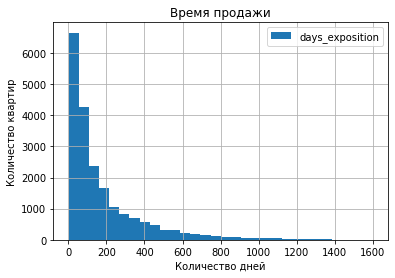

In [48]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))  #строим гистрограмму
plt.title('Время продажи') # подписываем график
plt.xlabel('Количество дней') # подписываем ось X
plt.ylabel('Количество квартир') # подписываем ось Y
plt.show() #  вывыодим на экран

Построим гистограмму для времени продаж со значениями от  0 до 200 дней

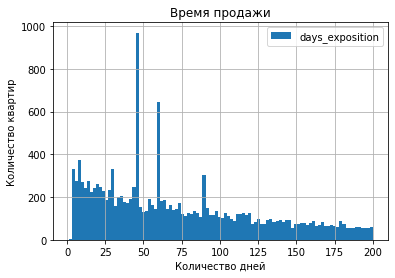

In [49]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200)) #  строим гистограмму для 200 дней
plt.title('Время продажи') # подписываем график
plt.xlabel('Количество дней') # подписываем ось X
plt.ylabel('Количество квартир') # df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))  #строим гистрограмму
plt.title('Время продажи') # подписываем график
plt.xlabel('Количество дней') # подписываем ось X
plt.ylabel('Количество квартир') # подписываем ось Y
plt.show() #  вывыодим на экран

Посмотрим описательную статистику для значений столбца `days_exposition`

In [50]:
df[df['days_exposition']!=0]['days_exposition'].describe() #среднее значение, медиана и межквартильный размах для ненулевых значений

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Посчитаем уникальные значения для ненулевых данных столбца `days_exposition`

In [51]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()# посчитаем уникальные значения для непустых данных

45      879
60      538
7       234
30      208
90      200
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1139, dtype: int64

**Вывод:** судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с количеством корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.
На текущий момент мы уже знаем, что эти данные аномальные, но они нам нужны, чтобы сравнить с данными, очищенными от аномалий далее.

Считаю важным уточнить у сотрудников насчет выбивающихся значений по датам снятия объявлений, чтобы убедиться в том, какие данные необходимо исключить из выборки.
Самыми быстрыми продажами можно назвать продажу в один день. Самой долгой продажей по диаграмме размаха (если не брать во внимание выбросы, которые лежат за 1.5 межквартального размаха, добавленного в третьей квартилии)-500 дней.

### Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.


Посмотрим какова доля значений 45, 60, 7, 30, 90:


In [52]:
df[df['days_exposition']!=0]['days_exposition'].value_counts(normalize=True)


45      0.043101
60      0.026380
7       0.011474
30      0.010199
90      0.009807
          ...   
1112    0.000049
1080    0.000049
1064    0.000049
1032    0.000049
1391    0.000049
Name: days_exposition, Length: 1139, dtype: float64

 Как мы видим, общая доля аномальных значений 45, 60, 7, 30, 90 примерно 10%, а значит смело приступим избавляться от этих аномалий.
 

Отфильтруем данные от аномалий в столбце `days_exposition` и запишем их в новый датафрейм new_df

In [53]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм new_df
new_df = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

  

Общая доля анамалий не превышает 10%. Значит смело отбрасываем эти значения.


Построим диаграмму размаха для очищенных данных столбца `days_exposition` 

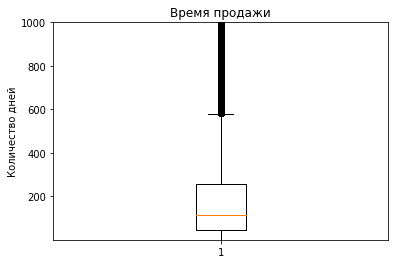

In [54]:
plt.boxplot(new_df['days_exposition']) #диаграмма размаха
plt.ylim(1,1000)
plt.title('Время продажи') # название графика
plt.ylabel('Количество дней') # подписываем ось Y 
plt.show() # выводим на экран

Построим гистрограмму для очищенных данных столбца `days_exposition`

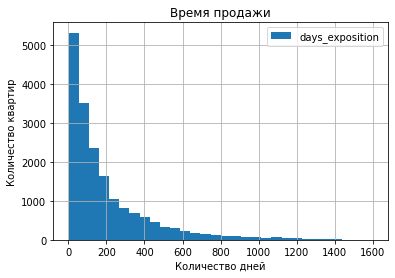

In [55]:
new_df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600)) # строим гистограмму
plt.title('Время продажи') # подписываем график
plt.xlabel('Количество дней') # подписываем ось X
plt.ylabel('Количество квартир') # подписываем ось Y
plt.show() #  вывыодим на экран

Построим гистограмму для очищенных данных столбца `days_exposition` со значениями от 0 до 200 дней

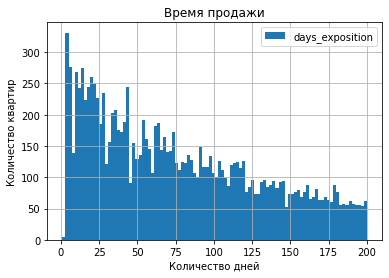

In [56]:
new_df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200)) #построим гистограмму
plt.title('Время продажи') # подписываем график
plt.xlabel('Количество дней') # подписываем ось X
plt.ylabel('Количество квартир') # подписываем ось Y
plt.show() #  вывыодим на экран

Посмотрим описательную статистику для очищенных значений столбца `days_exposition`

In [57]:
new_df['days_exposition'].describe() #среднее значение, медиана и межквартильный размах

count    18335.000000
mean       195.709136
std        226.796685
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**  

Ожидаемо, что в очищенных данных с аномалиями в значениях меньших медианы получаем бОльшие значения медианы и среднего  

значения - 114 и 195 соответственно, вместо 95 и 180. Аналогично, теперь нормальные значения располагаются от 1 до 580 дней

вместо от 1 до 500 дней.

###  Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от площади, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучаем зависимость от даты размещения: дня недели, месяца и года.

**Изучим зависимость цены от площади квартиры.**

Построим сводную таблицу

In [58]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area

,mean,count,median
total_area,,,
12.0,200000.000000,1,200000.0
13.0,180768.666667,3,142307.0
13.2,127727.000000,1,127727.0
14.0,85000.000000,1,85000.0
15.0,114999.500000,2,114999.5
...,...,...,...
590.0,110169.000000,1,110169.0
618.0,485436.000000,1,485436.0
631.0,221870.000000,1,221870.0


Для нашей таблицы построим диаграмму рассеяния

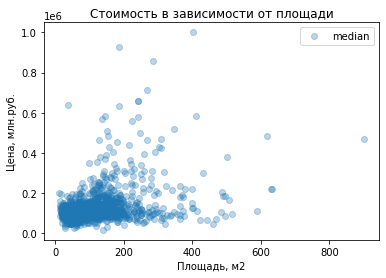

In [59]:
pivot_table_total_area.plot(y = 'median', style = 'o',alpha=0.3)
plt.title('Стоимость в зависимости от площади') # подписываем график
plt.xlabel('Площадь, м2') # подписываем ось X
plt.ylabel('Цена, млн.руб.') # подписываем ось Y
plt.show() #  вывыодим на экран

Диаграмма рассеяния — отличный инструмент для получения первого впечатления о возможной корреляции, но не является окончательным доказательством наличия связи между данными. Для обзора корреляций между ценой и площадью используем метод .corr().

In [60]:
df['total_area'].corr(df['price_per_area'])

0.3025705855894221

**Вывод:** видим, что зависимость слабая - согласно корреляции Пирсона - 0.3! То есть, чем больше площадь тем немного выше стоимость!

**Изучим зависимость цены квадратного метра от числа комнат.**

Построим график

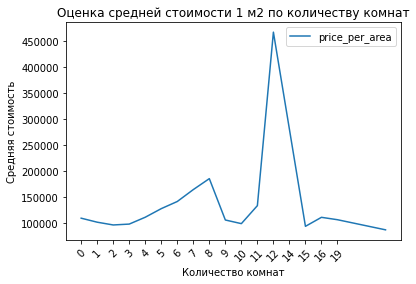

In [61]:
# Группируем по наличию комнат
# Целевая переменная - Стоимость 1м2 тыс. руб., находим среднее значение для каждой категории
data = df.groupby('rooms')['price_per_area'].mean() # Средняя стоимость для квартир, разбитых на группы по типам балконов 
data.plot() # Рисуем график

xticksList = data.index.values # Определяем список значений для оси x
plt.xticks(np.arange(xticksList.shape[0]), xticksList, rotation=45) # Переходим от численных подписей к категориальным. Поворачиваем текст на 45 градусов, чтобы подписи не заходили друг на друга
plt.xlabel('Количество комнат') # Подпись оси x
plt.ylabel('Средняя стоимость') # Подпись оси y
plt.title('Оценка средней стоимости 1 м2 по количеству комнат') # Подпись графика
plt.legend() # Выводим легенду
plt.show()   # Показываем график

In [62]:
df['rooms'].corr(df['price_per_area'])

0.055679781492603664

**Вывод:** судя по графику средняя стоимость 1 м2  двух-трёхкомнатных и для квартир из десяти и пятнадцати комнат ниже, чем для остальных категорий. Для квартир из 12-ти комнат наблюдаем резкое увеличение в 4 раза, думаю , что это выброс или не все в порядке с данными. Видим, что согласно корреляции Пирсона зависимости нет - 0.05. То есть, число комнат не влияет на стоимость 1м2.

**Изучим зависимость цены квадратного метра от удалённости от центра.**

Построим диаграмму рассеяния

<AxesSubplot:xlabel='cityCenters_nearest'>

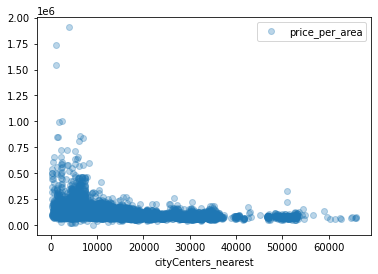

In [63]:
df.plot(x='cityCenters_nearest',y='price_per_area',style='o',alpha=0.3) #  строим график


 Для обзора корреляций между ценой и площадью используем метод .corr().

In [64]:
df['cityCenters_nearest'].corr(df['price_per_area']) # строим корреляцию

-0.31759628115540994

**Вывод:** видим явную зависимость стоимости квадратного метра от близости к центру! Чем ближе к центру, тем выше стоимость!

**Изучим зависимость цены квадратного метра от этажа (первого или последнего).**

Построим сводную таблицу

In [65]:
pivot_table_floor_category = df.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category

,mean,count,median
floor_category,,,
первый,82001.162943,2909,81250
последний,93378.509009,3330,87763


Построим график

<AxesSubplot:xlabel='floor_category'>

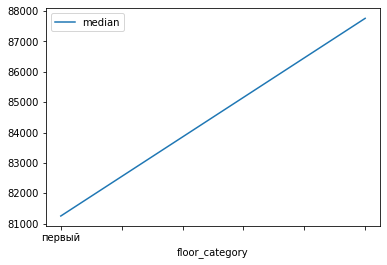

In [66]:
pivot_table_floor_category.plot(y = 'median') #  строим график

**Вывод:** из графика ничего не понятно! Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%!

**Изучим зависимость цены квадратного метра от даты размещения: дня недели.**

Построим сводную таблицу

In [67]:
pivot_table_first_day_weekday = df.pivot_table(index = 'first_day_weekday', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_weekday.columns = ['mean', 'count', 'median'] # строим сводную таблицу
pivot_table_first_day_weekday.sort_values('median', ascending = False)

,mean,count,median
first_day_weekday,,,
1,99667.761951,4163,95567.0
2,99584.276596,3948,95473.0
3,100194.284144,4276,95132.0
0,99462.125139,3596,94719.0
6,97758.773024,1683,94594.0
4,98924.551005,3980,94579.5
5,99045.405941,1919,93548.0


Посмотрим график

<AxesSubplot:xlabel='first_day_weekday'>

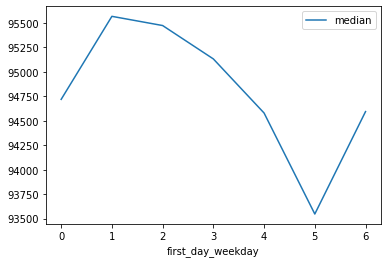

In [68]:
pivot_table_first_day_weekday.plot(y = 'median') #  строим график

**Вывод:** видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

**Изучим зависимость цены квадратного метра от даты размещения: месяца.**

Построим сводную таблицу

In [69]:
pivot_table_first_day_month = df.pivot_table(index = 'first_day_month', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_month.columns = ['mean', 'count', 'median']
pivot_table_first_day_month.sort_values('median', ascending = False)

,mean,count,median
first_day_month,,,
4,101987.648557,2356,96543.0
8,100108.687752,1739,96052.0
9,100518.872211,1972,95623.0
11,99228.002542,2360,95606.5
3,98951.544078,2575,95233.0
1,99732.675857,1487,95180.0
7,99612.893238,1686,95005.5
2,98762.248483,2636,95000.0
12,99501.177656,1638,94238.0


Посмотрим график

<AxesSubplot:xlabel='first_day_month'>

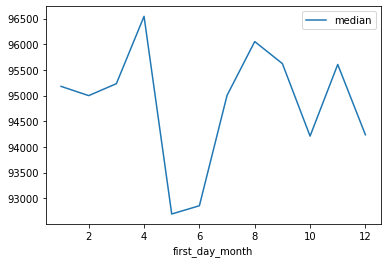

In [70]:
pivot_table_first_day_month.plot(y = 'median')

**Вывод:** самая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

**Изучим зависимость цены квадратного метра от даты размещения: года.**

Построим сводную таблицу

In [71]:
pivot_table_first_day_year = df.pivot_table(index = 'first_day_year', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_year.columns = ['mean', 'count', 'median']
pivot_table_first_day_year.sort_values('median', ascending = False)

,mean,count,median
first_day_year,,,
2014,124301.926471,136,106901.5
2019,107046.819923,2871,103199.0
2018,97762.264318,8486,95695.5
2015,104639.883362,1166,93364.5
2017,97637.679819,8161,92569.0
2016,98291.356648,2745,91743.0


Посмотрим график

<AxesSubplot:xlabel='first_day_year'>

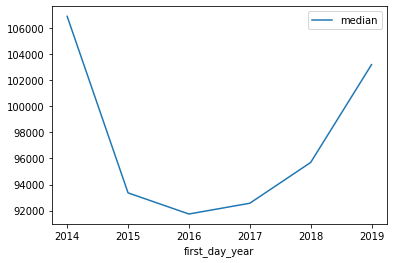

In [72]:
pivot_table_first_day_year.plot(y = 'median')

**Вывод:** видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться! Мы не рассматриваем сегментацию рынка и по факту стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году! В выводе присутствует реальный пример.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Формируем таблицу

In [73]:
df.groupby('locality_name')['price_per_area'].describe().sort_values(by='count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
Санкт-Петербург,15651.0,114868.433902,52656.137451,111.0,90980.5,104774.0,124409.50,1907500.0
поселок Мурино,552.0,85629.110507,14389.499613,50000.0,75713.0,86058.5,95579.25,138580.0
поселок Шушары,439.0,78550.883827,14053.002368,47700.0,68434.0,76829.0,86527.00,147826.0
Всеволожск,398.0,68654.007538,31456.361376,31400.0,59150.0,65789.0,74121.25,640422.0
Пушкин,369.0,103125.373984,21598.332979,59836.0,90000.0,100000.0,110526.00,256521.0
Колпино,338.0,75424.150888,12055.652122,47957.0,66666.0,74723.5,82576.25,125000.0
поселок Парголово,327.0,90175.489297,17249.160836,39205.0,78891.0,91642.0,101737.50,138522.0
Гатчина,307.0,68745.693811,14665.183154,10507.0,59885.0,67796.0,76341.50,146315.0
деревня Кудрово,299.0,92473.086957,12497.046398,54160.0,84334.5,91860.0,100356.50,142857.0


Построим диаграмму для топ 10 населённых пунктов:

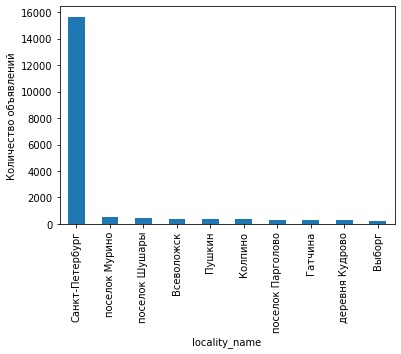

In [74]:
df.groupby('locality_name')['price_per_area'].describe()['count'].sort_values(ascending=False).iloc[:10].plot(kind='bar')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:** самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделии квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Постром график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Провём предобработку

In [75]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000 # переведём метры в километры
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999) # заполним пустоты маркерами 999999 
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int') # переведём в целочисленный тип данных

Построим таблицу

In [76]:
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_area', aggfunc = 'mean')
pivot_table_km

,price_per_area
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129526.480916
4,137412.971207
5,146977.869792
6,152277.455319
7,141399.287469
8,120538.701649


Посмотрим график

<AxesSubplot:xlabel='cityCenters_nearest_km'>

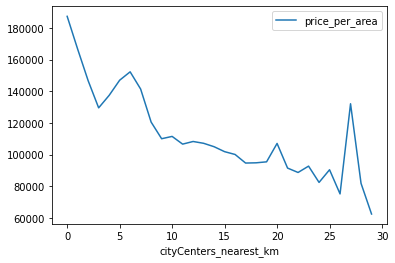

In [77]:
pivot_table_km.plot()  # строим график

**Вывод:** судя по графику центром считать будем радиус в 5 километров.

### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Выделим квартиры в центре, беря радиус 5 км

In [78]:

center_spb_df = df.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')#выделим квартиры в центре, беря за радиус 3 км

**Изучим площадь в центре Санкт-Петербурга**

Построим гистограмму

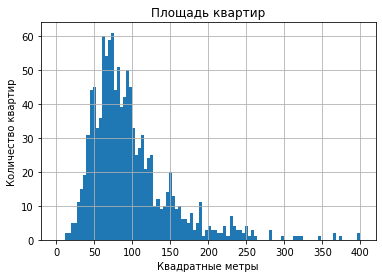

In [79]:
center_spb_df['total_area'].hist(bins=100,range=(0,400)) # построим гистограмму
plt.title('Площадь квартир') # подпишем график
plt.xlabel('Квадратные метры') # подпишем ось x
plt.ylabel('Количество квартир') # подпишем ось Y
plt.show() # выведем график на экран

Посмотрим статистику

In [80]:
center_spb_df['total_area'].describe() # выведем описательную статистику

count    1157.000000
mean       97.392947
std        55.786639
min        12.000000
25%        62.000000
50%        84.100000
75%       115.200000
max       517.000000
Name: total_area, dtype: float64

**Вывод:** распределение данных нормальное, есть выбросы но они не сильно влияют на данные.Больше всего продается квартир площадью 75 м2. С помошью describe получили общее представление.

**Изучим цену в центре Санкт-Петербурга**

Построим гистограмму

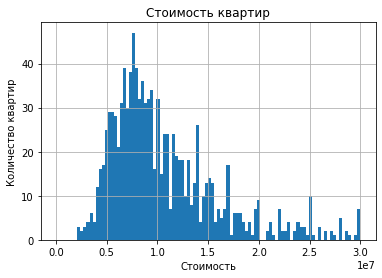

In [81]:
center_spb_df['last_price'].hist(bins=100,range=(0,30000000)) #построим гистограмму
plt.title('Стоимость квартир') #подпишем график
plt.xlabel('Стоимость') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Посмотрим статистику

In [82]:
center_spb_df['last_price'].describe() #выведем описательную статистику

count    1.157000e+03
mean     1.603428e+07
std      3.294823e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.449000e+07
max      7.630000e+08
Name: last_price, dtype: float64

**Вывод:** с данными все впорядке, но значения выводятся в экспоненциальной записи чисел. Из гистораммы видно, что больше всего квартир продается за 7,5 млн. руб.

**Изучим число комнат в центре Санкт-Петербурга**

Построим гистограмму

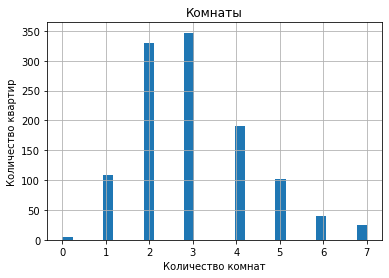

In [83]:
center_spb_df['rooms'].hist(bins=30,range=(0,7)) #построим гистограмму
plt.title('Комнаты') #подпишем график
plt.xlabel('Количество комнат') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Выведем статистику

In [84]:
center_spb_df['rooms'].describe() #выведем описательную статистику

count    1157.000000
mean        3.104581
std         1.558087
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

**Вывод:** с данными все впорядке. Больше всего продаются двух-трёхкомнатные квартиры.

**Изучим высоту потолков в центре Санкт-Петербурга**

Построим гистограмму

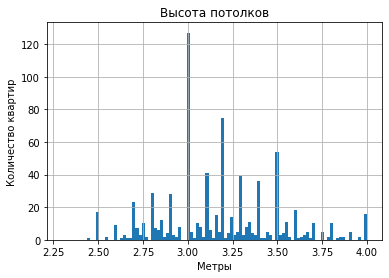

In [85]:
center_spb_df['ceiling_height'].hist(bins=100,range=(2.3,4)) #построим гистограмму
plt.title('Высота потолков') #подпишем график
plt.xlabel('Метры') #подпишем ось x
plt.ylabel('Количество квартир') #подпишем ось Y
plt.show() #выведем график на экран

Посмотрим статистику

In [86]:
center_spb_df['ceiling_height'].describe() #выведем описательную статистику

count    795.000000
mean       3.263321
std        1.376697
min        2.450000
25%        3.000000
50%        3.170000
75%        3.400000
max       32.000000
Name: ceiling_height, dtype: float64

**Вывод:** с данными все впорядке. Больше всего продаж квартир с высотой потолка 3 м.

**Изучим зависимость цены от площади для центра Санкт-Петербурга**

Построим сводную таблицу

In [87]:
pivot_table_total_area = center_spb_df.pivot_table(index = 'total_area', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area

,mean,count,median
total_area,,,
12.0,200000.0,1,200000.0
13.0,292307.0,1,292307.0
16.0,131250.0,1,131250.0
17.6,193181.0,1,193181.0
20.0,119250.0,1,119250.0
...,...,...,...
374.6,86091.0,1,86091.0
400.0,1063750.0,2,1063750.0
401.0,1000748.0,1,1000748.0


Построим диаграмму рассеяния

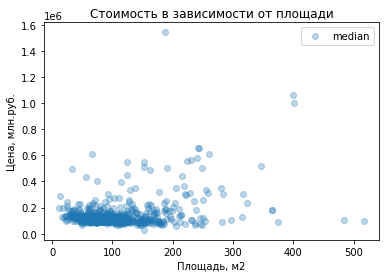

In [88]:
pivot_table_total_area.plot(y = 'median', style = 'o',alpha=0.3)# строим график
plt.title('Стоимость в зависимости от площади') # подписываем график
plt.xlabel('Площадь, м2') # подписываем ось X
plt.ylabel('Цена, млн.руб.') # подписываем ось Y
plt.show() #  вывыодим на экран

Диаграмма рассеяния — отличный инструмент для получения первого впечатления о возможной корреляции, но не является окончательным доказательством наличия связи между данными. Для обзора корреляций между ценой и площадью используем метод .corr().

In [89]:
center_spb_df['total_area'].corr(center_spb_df['price_per_area'])

0.2596174302069221

**Вывод:** видим, что зависимость слабая - согласно корреляции Пирсона - 0.26. То есть, чем больше площадь тем немного выше стоимость.

**Изучим зависимость цены квадратного метра от числа комнат в центре Санкт-Петербурга**

Построим график

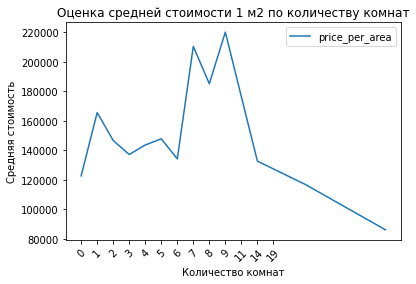

In [90]:
# Группируем по наличию комнат
# Целевая переменная - Стоимость 1м2 тыс. руб., находим среднее значение для каждой категории
data = center_spb_df.groupby('rooms')['price_per_area'].mean() # Средняя стоимость для квартир, разбитых на группы по типам балконов 
data.plot() # Рисуем график

xticksList = data.index.values # Определяем список значений для оси x
plt.xticks(np.arange(xticksList.shape[0]), xticksList, rotation=45) # Переходим от численных подписей к категориальным. Поворачиваем текст на 45 градусов, чтобы подписи не заходили друг на друга
plt.xlabel('Количество комнат') # Подпись оси x
plt.ylabel('Средняя стоимость') # Подпись оси y
plt.title('Оценка средней стоимости 1 м2 по количеству комнат') # Подпись графика
plt.legend() # Выводим легенду
plt.show()   # Показываем график

Считаем корреляцию

In [91]:
center_spb_df['rooms'].corr(center_spb_df['price_per_area']) # считаем корреляцию

0.00207002374239508

**Вывод:** судя по графику средняя стоимость 1 м2 для квартир до 6-ти комнат колеблется в районе 140-160 т.р. Но для квартир из 7-9 комнат цена колеблется в районе 190-220 т.р. или примерно на 30% больше.
Но, что согласно корреляции Пирсона зависимости нет - 0.02. То есть, число комнат не влияет на стоимость 1м2.

**Изучим зависимость цены квадратного метра в центре Санкт-Петербурга от этажа.**

Построим сводную таблицу и график

,mean,count,median
floor_category,,,
первый,123509.146341,164,107508.5
последний,146998.742537,268,114432.0


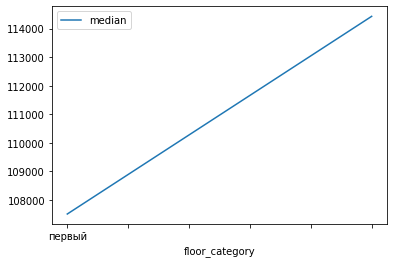

In [92]:
center_spb_floor_category = center_spb_df.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

**Вывод:** нет особых отличий от всей выборки квартир! Квартиры на первом этаже в среднем дешевле, чем на последнем!

**Изучим зависимость стоимости квадратного метра центра Санкт-Петербурга от удаленности от центра.**

Построим диаграмму рассеяния

<AxesSubplot:xlabel='cityCenters_nearest'>

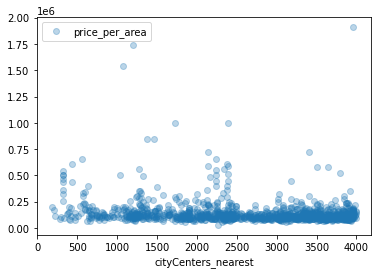

In [93]:
center_spb_df.plot(x='cityCenters_nearest',y='price_per_area',style='o',alpha=0.3)

Для обзора корреляций между ценой и площадью используем метод .corr().

In [94]:
center_spb_df['cityCenters_nearest'].corr(center_spb_df['price_per_area']) #  считаем корреляцию

-0.16406065760023708

**Вывод:** видим, что цена 1 м2 в центре примерна одинакова. Ожидаемо, четкой зависимости нет, так как у нас уже сделана выборка по центру города.

**Изучим зависимость цены квадратного метра в центре Санкт-Петербурга от даты размещения: дня недели.**

Построим сводную таблицу

In [95]:
pivot_table_first_day_weekday_center_spb = center_spb_df.pivot_table(index = 'first_day_weekday', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_weekday_center_spb.columns = ['mean', 'count', 'median']
pivot_table_first_day_weekday_center_spb.sort_values('median', ascending = False)

,mean,count,median
first_day_weekday,,,
0,145551.070588,170,121354.0
5,161508.078947,76,120568.0
4,139527.909953,211,118000.0
2,144332.984536,194,114902.5
1,148477.308511,188,114104.5
6,143555.014925,67,110843.0
3,147413.011952,251,110132.0


Построим график

<AxesSubplot:xlabel='first_day_weekday'>

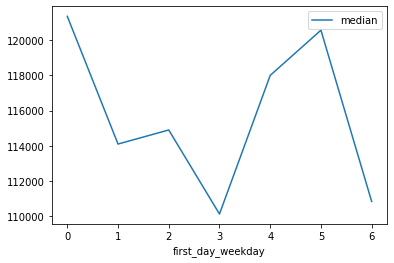

In [96]:
pivot_table_first_day_weekday_center_spb.plot(y = 'median') # строим график

**Вывод:**  ситуация отличается от всей выборки, минимальные средние цены в четверг и воскресенье, самые высокие - в понедельник и субботу!

**Зависимость стоимости квадратного метра в центре Санкт-Петербурге от месяца размещения объявления.**

Построим сводную таблицу

In [97]:
pivot_table_first_day_month_center_spb = center_spb_df.pivot_table(index = 'first_day_month', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_month_center_spb.columns = ['mean', 'count', 'median']
pivot_table_first_day_month_center_spb.sort_values('median', ascending = False)

,mean,count,median
first_day_month,,,
4,169411.373913,115,126484
10,143129.021277,94,121978
12,162849.843373,83,121568
3,149574.508475,118,117409
1,147760.090909,77,117244
2,141960.713178,129,116406
9,155581.594059,101,116054
11,136308.390244,123,112639
7,137694.565657,99,112195


Построим график

<AxesSubplot:xlabel='first_day_month'>

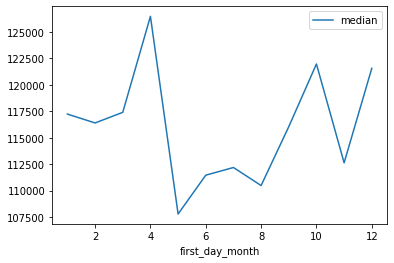

In [98]:
pivot_table_first_day_month_center_spb.plot(y = 'median')

**Вывод:** ситуация отличается от общей выборкои - самая высокая стоимость метра в апреле и октябре! Самая низкая стоимость в мае и августе.

**Зависимость стоимости квадратного метра в центре Санкт-Петербурга от года размещения объявления.**

Построим сводную таблицу

In [99]:
pivot_table_first_day_year_center_spb = center_spb_df.pivot_table(index = 'first_day_year', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_first_day_year_center_spb.columns = ['mean', 'count', 'median']
pivot_table_first_day_year_center_spb.sort_values('median', ascending = False)

,mean,count,median
first_day_year,,,
2014,253598.222222,9,260000.0
2019,174020.753968,126,132382.5
2018,140129.402941,340,117898.0
2017,141554.705036,417,114655.0
2016,135592.863946,147,109090.0
2015,154054.330508,118,107055.0


Построим график

<AxesSubplot:xlabel='first_day_year'>

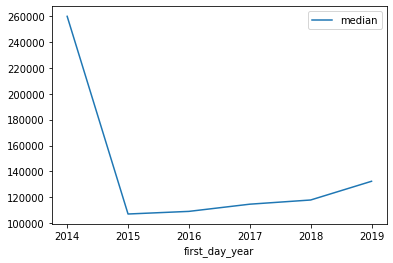

In [100]:
pivot_table_first_day_year_center_spb.plot(y = 'median')

**Вывод:** ситуация схожа с общей выборкой, и видим, что с 2014 до 2015 года цена падала, но далее цена начала подниматься в среднем от 1%  до 10% в год! 

## Общий вывод

* Для анализа был дан датасет с информацией по продаже квартир.  
Состоял из 22 колонок и 23699 строк. 6 колонок не пригодились (total_images, open_plan, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest).
В процессе предобработки было удалено 133 строки, то есть осталось 23565 строк, удалено 0,56% данных - вполне хорошо.
В столбцах была проведена предобработка данных.  

На основании предобработанных данных был проведен анализ и сделаны выводы по заданым вопросам:  


  * Больше всего квартир продаётся площадями 45-49 кв.м - это, похоже, самые популярные 1-2 комнатные квартиры.  
Сделан вывод, что больше всего квартир продаются по цене в диапазоне 3-4 млн.руб. Средняя стоимость квартир 6,5 млн.руб., медиана -4,6 млн.руб.
Больше всего квартир с высотой потолков 2.7 м.  

  * Медиана и среднее время продажи квартир составляет  114 и 195 дней соответственно.  
  
    Самые быстрые продажи 1 день, самые долгие - более 4-х лет.  
    
  * Факторы больше всего влияющие на стоимость квартиры:  
    1. Больше всего на стоимость квартиры влияет её площадь(прямопропорцианальная зависимость).
    2. Среднее влияние оказывает удаленность от центра(обратнопропорцианальная зависимость) 
    3. Также надо отметить, что есть зависимость от этажа - первый этаж мало кто любит и цена его существенно отличается от остальных; люди предпочитают не первый и не последний этаж - его цена выше(но на немного выше последнего).
    4. По дате размещения объявлений о продаже: по субботам размещаются объявления с ценой ниже, чем в другие дни.
       Самые высокие цены в апреле и августе! Начиная с 2016  года цены на жильё растёт!  
       
  * Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, 
    тогда как самая низкая стоимость в Выборге.  
    
  * Выделим квартиры в центре, беря радиус 5 км:
  
    1. Больше всего квартир в центре продаётся площадью 75 м2. и за 7.5 млн.руб. 
    2. Больше всего продаются в центре двух-трёхкомнатные квартиры.
    3. Цены за 1 м2 в центре примерно одинаковы
    4. По дате размещения объявлений о продаже: 
       ситуация отличается от общей выборки: минимальные цены в четверг и воскресенье, высокие цены в апреле и октябре, низкие в мае и августе.
       Но если сравнивать цены по годам размещения, то ситуация схожа с общей выборкой. Начиная с 2016  года цены на жильё растёт!  
       

## Чек-лист готовности проекта


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод